# Proyecto de Visualización de Datos

Docente: Ing.  RenÉ Elizalde 

Integrantes: Jessica Davila,
             Carlos Saca

### Set de Datos

#### Ecuador en cifras
##### Mediante la siguiente página (http://www.ecuadorencifras.gob.ec/institucional/home/) se ha podido obtener información acerca de las encuestas de condiciones de vida del año 2013, los mismos que han sido evaluados mediante herramientas para la lipieza y manipulación de datos.

### Marco Teórico
#### Python
##### Es un lenguaje de programación interpretado, interactivo y orientado a objetos. Incorpora módulos, excepciones, tipado dinámico, tipos de datos dinámicos de muy alto nivel y clases. Python combina una potencia notable con una sintaxis muy clara. Tiene interfaces para muchas llamadas y bibliotecas del sistema, así como para varios sistemas de ventanas, y es extensible en C o C ++. También se puede usar como un lenguaje de extensión para aplicaciones que necesitan una interfaz programable. Finalmente, Python es portátil: se ejecuta en muchas variantes de Unix, en la Mac y en Windows 2000 y versiones posteriores. [1]
#### Pandas
##### Es un paquete de Python que proporciona estructuras de datos rápidas, flexibles y expresivas diseñadas para que trabajar con datos "relacionales" o "etiquetados" sea fácil e intuitivo. Su objetivo es ser el componente fundamental de alto nivel para hacer un análisis práctico y real de datos en Python. Además, tiene el objetivo más amplio de convertirse en la herramienta de análisis / manipulación de datos de código abierto más potente y flexible disponible en cualquier idioma. [2]
#### Bokeh
##### Es una biblioteca de visualización interactiva de Python que se dirige a navegadores web modernos para su presentación. Su objetivo es proporcionar una construcción elegante y concisa de gráficos novedosos al estilo de D3.js y ampliar esta capacidad con interactividad de alto rendimiento en conjuntos de datos de gran tamaño o de transmisión. Bokeh puede ayudar a cualquiera que desee crear trazados interactivos, cuadros de mando y aplicaciones de datos de manera rápida y fácil. [3]
#### Otras Herramientas que se hayan utilizado
#### Pylab inline
##### Especifica que las figuras se deben mostrar inline, directamente en el cuaderno.[4]
#### Matplotlib
##### Es una biblioteca de trazado 2D de Python que produce figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos en todas las plataformas. Matplotlib se puede utilizar en scripts Python, el shell Python e IPython , el bloc de notas jupyter , servidores de aplicaciones web y cuatro toolkits de interfaz gráfica de usuario. Capturas de pantallacapturas de pantallacapturas de pantallacapturas de pantalla. Matplotlib intenta hacer que las cosas fáciles sean fáciles y difíciles. Puede generar gráficos, histogramas, espectros de potencia, gráficos de barras, diagramas de errores, diagramas de dispersión, etc., con solo unas pocas líneas de código. Para ver ejemplos, vea los diagramas de muestra y la galería de miniaturas . Para el trazado simple, el módulo pyplot proporciona una interfaz parecida a MATLAB, particularmente cuando se combina con IPython . Para el usuario avanzado, tiene un control total de los estilos de línea, las propiedades de fuente, las propiedades de los ejes, etc., a través de una interfaz orientada a objetos o mediante un conjunto de funciones familiares para los usuarios de MATLAB.[5]

### Proyectos Desarrollados

In [1]:
%pylab inline
import seaborn as sns
import pandas as pd
import bokeh as bp
from bokeh.plotting import  figure, show, output_notebook, output_file,figure 
from bokeh.models import CustomJS, Slider, ColumnDataSource
from bokeh.palettes import inferno, Spectral6
from bokeh.io import show, output_file
from bokeh.transform import factor_cmap


import numpy as np


plt.rcParams['figure.figsize']=(20,8)
pd.set_option('precision', 5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
datos = pd.read_csv("Encuesta_Condiciones_Vida_2013/01_ecv6r_vivienda.csv", 
                        sep=".")


c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (0,75,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
datos.columns

Index([u'IDENTIF_SECT', u'IDENTIF_HOG', u'AREA_5000', u'AREA_2000',
       u'CIUDAD_AUTO', u'PROVINCIA', u'ZDP', u'REGION', u'CIUDAD', u'ZONA',
       ...
       u'AM1703C', u'AM1704A', u'AM1704B', u'AM1704C', u'AM1705A', u'AM1705B',
       u'AM1705C', u'FEXP', u'REGIONAL', u'FASE'],
      dtype='object', length=166)

In [4]:
#datos.dtypes
datos.head()

,IDENTIF_SECT,IDENTIF_HOG,AREA_5000,AREA_2000,CIUDAD_AUTO,PROVINCIA,ZDP,REGION,CIUDAD,ZONA,...,AM1703C,AM1704A,AM1704B,AM1704C,AM1705A,AM1705B,AM1705C,FEXP,REGIONAL,FASE
0,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,1,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
1,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,1,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
2,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,1,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
3,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,1,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
4,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,1,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1


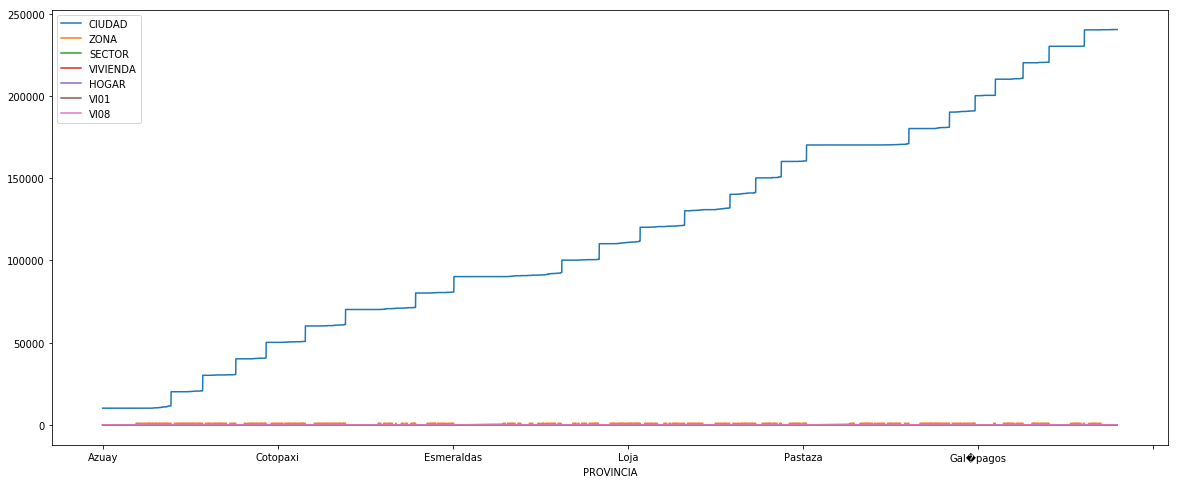

In [5]:
datos.plot("PROVINCIA")

In [6]:
datos['REGION'].unique()

array(['Sierra', 'Costa', 'Amazon\xeda', 'Gal\xe1pagos'], dtype=object)

In [7]:
index_reg_datos = datos.set_index("REGION").sort_index()

In [8]:
#VI01== Numero de Viviedas
#VI08== Numero de Cuartos
datos.describe()

,CIUDAD,ZONA,SECTOR,VIVIENDA,HOGAR,VI01,VI08
count,28970.00000,28970.00000,28970.00000,28970.00000,28970.00000,28970.00000,28970.00000
mean,116426.68498,481.72465,9.87287,6.48895,1.00480,1.01008,3.14574
std,65813.74005,474.70864,13.92082,3.45138,0.07668,0.11529,1.36289
min,10150.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
25%,70150.00000,7.00000,3.00000,3.00000,1.00000,1.00000,2.00000
50%,110150.00000,263.00000,6.00000,6.00000,1.00000,1.00000,3.00000
75%,170160.00000,999.00000,10.00000,9.00000,1.00000,1.00000,4.00000
max,240352.00000,999.00000,141.00000,12.00000,4.00000,4.00000,16.00000


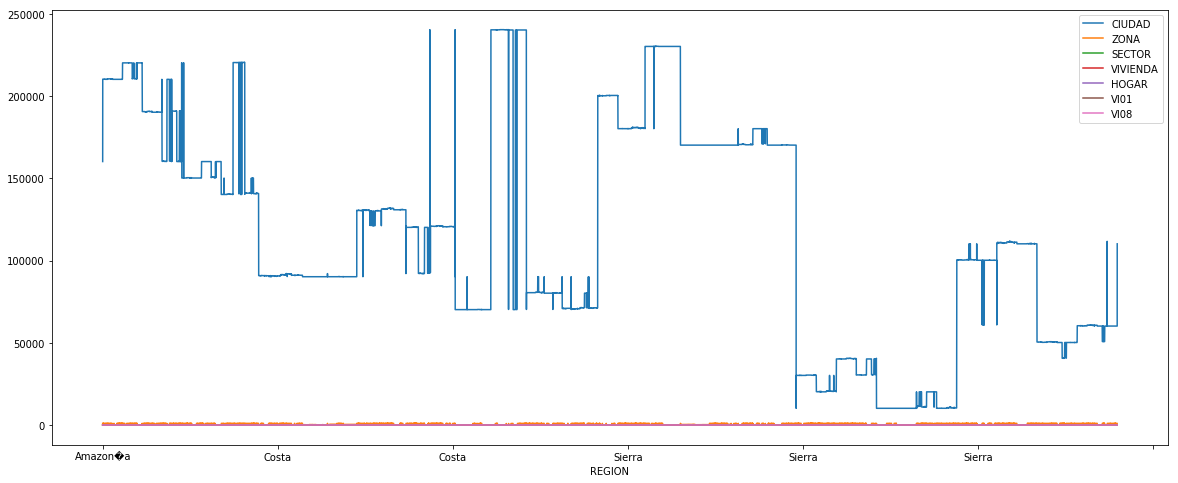

In [9]:
index_reg_datos.plot()

In [10]:
#Viviendas en Las 3 provincias que conforman La Zona de Planificacion 7 (ZDP)
#VI03= Material del Techo
#VI04= Material de las Paredes
#VI05= Material del Piso
#VI06A= Estado del Techo
#VI06A= La vivienda que ocupan es:
#VI39= Pagan por servicio telefonico 
#VI22= Pagan en este hogar por el agua
index_reg_datos.loc[
                    ["Sierra", "Costa", "Amazon\xeda","Gal\xe1pagos"],
                    ['ZDP','VI03','VI04','VI05','VI06A','VI36', 'VI30', 'VI22']
                  ]

,ZDP,VI03,VI04,VI05,VI06A,VI36,VI30,VI22
REGION,,,,,,,,
Sierra,Zona 3,Asbesto (Eternit),Bloque /ladrillo,Tabla / tabl�n no tratado,Regular,Propia y totalmente pagada,,No
Sierra,Zona 3,Palma / paja /hoja,Bloque /ladrillo,Tierra,Malo,Propia y totalmente pagada,,No
Sierra,Zona 3,Teja,Bloque /ladrillo,Tierra,Regular,Propia y totalmente pagada,,No
Sierra,Zona 3,Zinc,Bloque /ladrillo,Tierra,Regular,Propia y totalmente pagada,,No
Sierra,Zona 3,Palma / paja /hoja,Bloque /ladrillo,Tierra,Malo,Propia y totalmente pagada,,No
Sierra,Zona 3,Palma / paja /hoja,Bahareque (ca�a y carrizo revestido),Tierra,Malo,Propia y totalmente pagada,,No
Sierra,Zona 3,Teja,Bloque /ladrillo,Tabla / tabl�n no tratado,Regular,Propia y totalmente pagada,,Si
Sierra,Zona 3,Teja,Bloque /ladrillo,Tierra,Regular,Propia y totalmente pagada,,Si
Sierra,Zona 3,Hormig�n / losa / cemento,Bloque /ladrillo,Cemento / ladrillo,Regular,Propia y totalmente pagada,,Si


In [11]:
pd.value_counts(datos["REGION"])

Sierra       14259
Costa         9682
Amazon�a      4452
Gal�pagos      577
Name: REGION, dtype: int64

In [12]:
datos['PROVINCIA'].unique()


array(['Azuay', 'Bolivar', 'Ca\xf1ar', 'Carchi', 'Cotopaxi', 'Chimborazo',
       'El Oro', 'Esmeraldas', 'Guayas', 'Imbabura', 'Loja', 'Los Rios',
       'Manabi', 'Morona Santiago', 'Napo', 'Pastaza', 'Pichincha',
       'Tungurahua', 'Zamora Chinchipe', 'Gal\xe1pagos', 'Sucumbios',
       'Orellana', 'Santo Domingo de los Tsachilas', 'Santa Elena'], dtype=object)

In [13]:
index_pro_datos = datos.set_index("PROVINCIA").sort_index()

In [14]:
index_pro_datos.loc[
                    ["El Oro", "Loja", "Zamora Chinchipe"],
                    ['ZDP','VI03','VI04','VI05','VI06A','VI36', 'VI30', 'VI22']
                  ].head(5)

,ZDP,VI03,VI04,VI05,VI06A,VI36,VI30,VI22
PROVINCIA,,,,,,,,
El Oro,Zona 7,Zinc,Ca�a sin revestir,Tabla / tabl�n no tratado,Bueno,Propia y totalmente pagada,,Si
El Oro,Zona 7,Asbesto (Eternit),Asbesto / cemento,Cemento / ladrillo,Regular,Propia y totalmente pagada,,Si
El Oro,Zona 7,Zinc,Bloque /ladrillo,Cer�mica / baldosa / vinyl,Regular,Propia y totalmente pagada,Si,Si
El Oro,Zona 7,Hormig�n / losa / cemento,Bloque /ladrillo,Cer�mica / baldosa / vinyl,Bueno,Propia y totalmente pagada,,Si
El Oro,Zona 7,Zinc,Ca�a sin revestir,Tierra,Malo,Cedida,,Si


In [15]:
#sns.factorplot(x="CIUDAD",y="VI36",hue="VI22",data=datos,palette="muted", size=10,kind="bar")


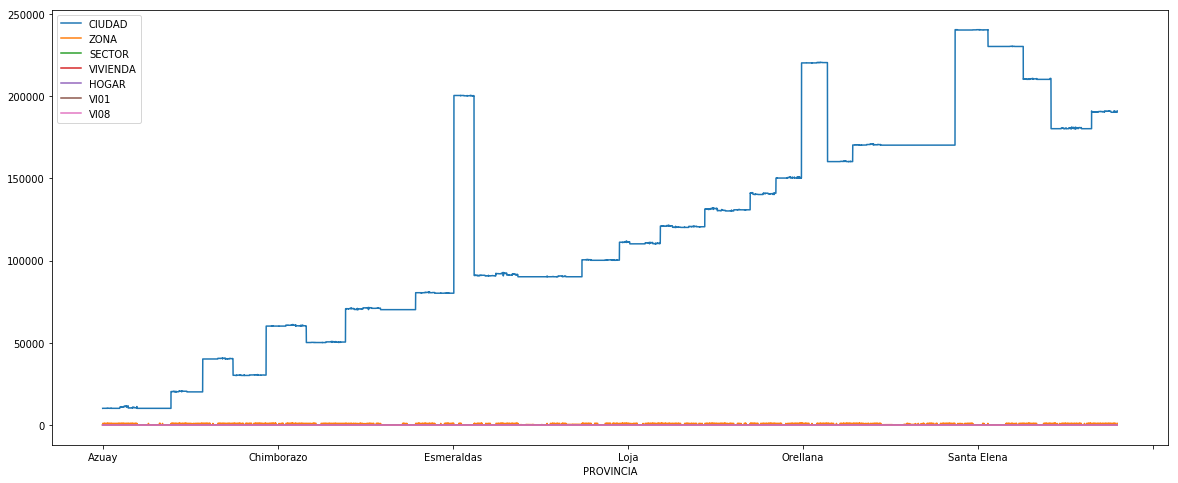

In [16]:
index_pro_datos.plot()

In [17]:
index_geo_data = datos.set_index("REGIONAL","PROVINCIA").sort_index()

In [18]:
index_geo_data.head(40)

,IDENTIF_SECT,IDENTIF_HOG,AREA_5000,AREA_2000,CIUDAD_AUTO,PROVINCIA,ZDP,REGION,CIUDAD,ZONA,...,AM1703B,AM1703C,AM1704A,AM1704B,AM1704C,AM1705A,AM1705B,AM1705C,FEXP,FASE
REGIONAL,,,,,,,,,,,,,,,,,,,,,
Centro,50154999003,"5,0155E+13",Rural,Rural,,Cotopaxi,Zona 3,Sierra,50154,999,...,,,No aplica,,,No aplica,,,"100,691818",Fase 1
Centro,50250999001,"5,0251E+13",Rural,Rural,,Cotopaxi,Zona 3,Sierra,50250,999,...,,,No aplica,,,No aplica,,,"80,93679989",Fase 2
Centro,50250999001,"5,0251E+13",Rural,Rural,,Cotopaxi,Zona 3,Sierra,50250,999,...,,,No aplica,,,No aplica,,,"80,93679989",Fase 2
Centro,50250999001,"5,0251E+13",Rural,Rural,,Cotopaxi,Zona 3,Sierra,50250,999,...,,,No aplica,,,No aplica,,,"80,93679989",Fase 2
Centro,50250999001,"5,0251E+13",Rural,Rural,,Cotopaxi,Zona 3,Sierra,50250,999,...,,,No aplica,,,No aplica,,,"80,93679989",Fase 2
Centro,50250999001,"5,0251E+13",Rural,Rural,,Cotopaxi,Zona 3,Sierra,50250,999,...,,,No aplica,,,No aplica,,,"80,93679989",Fase 2
Centro,50250999001,"5,0251E+13",Rural,Rural,,Cotopaxi,Zona 3,Sierra,50250,999,...,,,No aplica,,,No aplica,,,"80,93679989",Fase 2
Centro,50250999001,"5,0251E+13",Rural,Rural,,Cotopaxi,Zona 3,Sierra,50250,999,...,,,No aplica,,,No aplica,,,"80,93679989",Fase 2
Centro,50250999001,"5,0251E+13",Rural,Rural,,Cotopaxi,Zona 3,Sierra,50250,999,...,,,No aplica,,,No aplica,,,"80,93679989",Fase 2


In [19]:
datos_d = datos.set_index(["IDENTIF_SECT"],
                          ["PROVINCIA","CIUDAD_AUTO"],
                          ["CIUDAD","ZONA","SECTOR"]).sort_index()

In [20]:
datos_d.head()


,,IDENTIF_HOG,AREA_5000,AREA_2000,CIUDAD_AUTO,PROVINCIA,ZDP,REGION,CIUDAD,ZONA,SECTOR,...,AM1703C,AM1704A,AM1704B,AM1704C,AM1705A,AM1705B,AM1705C,FEXP,REGIONAL,FASE
,IDENTIF_SECT,,,,,,,,,,,,,,,,,,,,,
0,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,1,11,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
1,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,1,11,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
2,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,1,11,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
3,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,1,11,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1
4,10150001011,"1,015E+13",Urbano,Urbano,Cuenca,Azuay,Zona 6,Sierra,10150,1,11,...,,No aplica,,,No aplica,,,"98,75659329",Sur,Fase 1


In [21]:
#Viviendas por provincias
pd.value_counts(datos["PROVINCIA"])

Guayas                            3082
Pichincha                         2923
El Oro                            2001
Azuay                             1951
Manabi                            1296
Los Rios                          1270
Loja                              1168
Tungurahua                        1159
Chimborazo                        1147
Cotopaxi                          1120
Esmeraldas                        1093
Imbabura                          1068
Santo Domingo de los Tsachilas    1008
Ca�ar                              945
Santa Elena                        940
Bolivar                            904
Carchi                             866
Sucumbios                          792
Orellana                           742
Morona Santiago                    735
Zamora Chinchipe                   733
Napo                               730
Pastaza                            720
Gal�pagos                          577
Name: PROVINCIA, dtype: int64

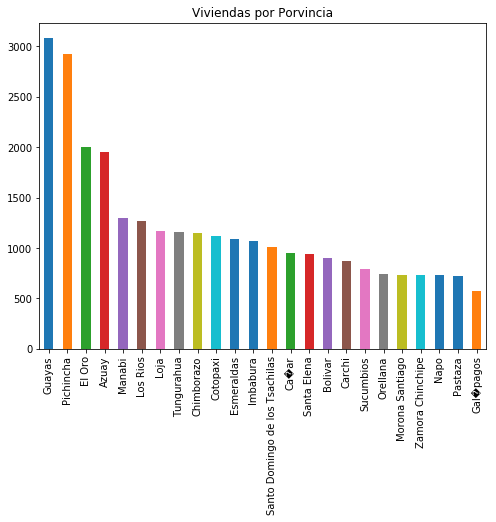

In [22]:
#Vicviendas por provincia
plot = datos['PROVINCIA'].value_counts().plot(kind='bar',
                                              figsize=(8,6),
                                            title='Viviendas por Porvincia')

In [23]:
# Tabla de frecuencia relativa de provincias
100 * datos['PROVINCIA'].value_counts() / len(datos['PROVINCIA'])

Guayas                            10.63859
Pichincha                         10.08975
El Oro                             6.90715
Azuay                              6.73455
Manabi                             4.47359
Los Rios                           4.38385
Loja                               4.03176
Tungurahua                         4.00069
Chimborazo                         3.95927
Cotopaxi                           3.86607
Esmeraldas                         3.77287
Imbabura                           3.68657
Santo Domingo de los Tsachilas     3.47946
Ca�ar                              3.26200
Santa Elena                        3.24474
Bolivar                            3.12047
Carchi                             2.98930
Sucumbios                          2.73386
Orellana                           2.56127
Morona Santiago                    2.53711
Zamora Chinchipe                   2.53020
Napo                               2.51985
Pastaza                            2.48533
Gal�pagos  

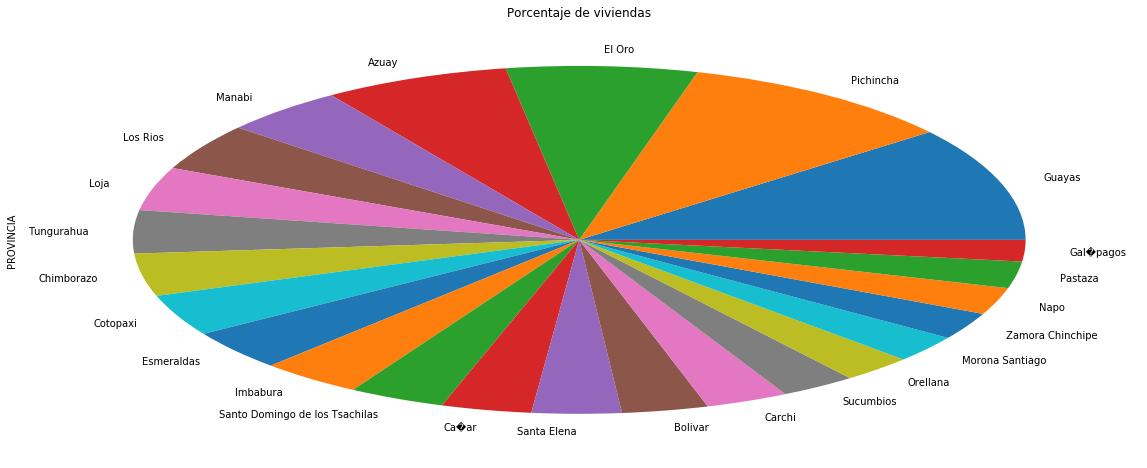

In [24]:
# Gráfico de barras de frecuencias relativas.
plot = (100 * datos['PROVINCIA'].value_counts() / len(datos['PROVINCIA'])).plot(kind='pie',
                                                                                title='Porcentaje de viviendas')

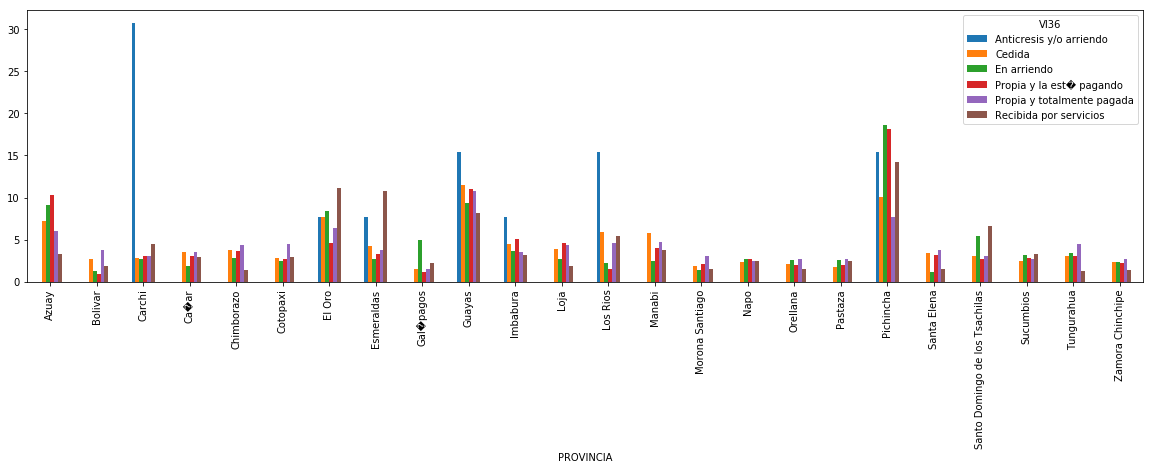

In [26]:
# Gráfico de barras de las frecuencias relativas de tipo de vivienda

viviendas = pd.crosstab(index=datos['PROVINCIA'],
            columns=datos['VI36']).apply(lambda r: r/r.sum() *100,
                                              axis=0).plot(kind='bar',figsize=(20,5))

In [27]:
pd.crosstab(index=datos['PROVINCIA'],
            columns=datos['VI30'], margins=True).head()


VI30,,No,Si,All
PROVINCIA,,,,
Azuay,900,9,1042,1951
Bolivar,684,7,213,904
Carchi,581,5,280,866
Ca�ar,654,0,291,945
Chimborazo,844,5,298,1147


In [80]:
#Servicio de luz electrica por provincias
luz = pd.crosstab(index=datos['PROVINCIA'],
            columns=datos['VI26'])


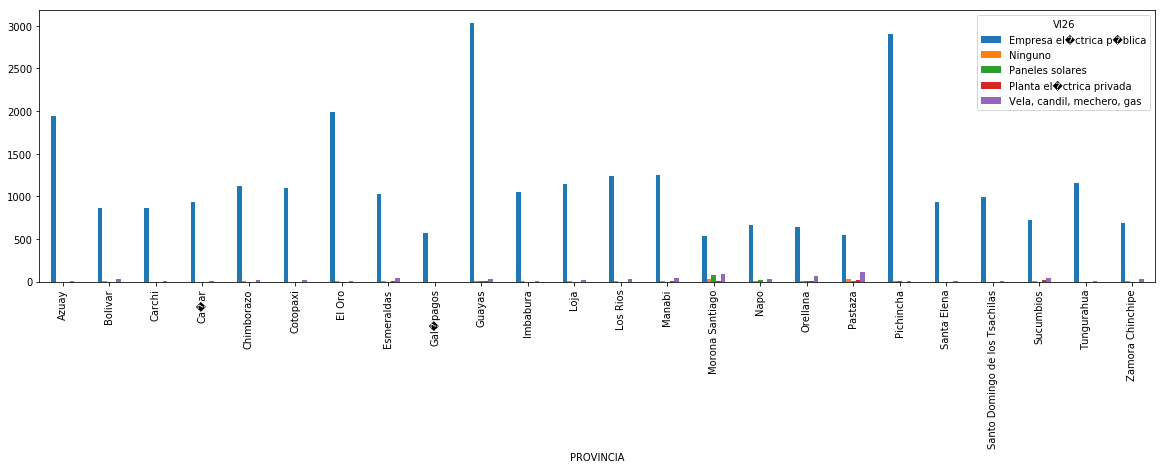

In [81]:
luz.plot(kind='bar',figsize=(20,5))

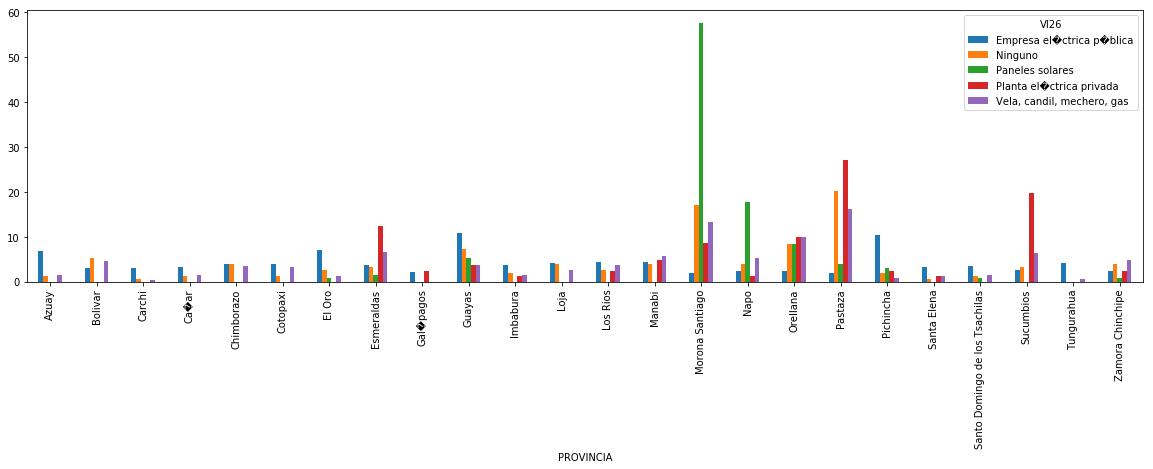

In [30]:
#Frecuenciasrelativas del servicio de luz electrica

luz = pd.crosstab(index=datos['PROVINCIA'],
            columns=datos['VI26']).apply(lambda r: r/r.sum() *100,
                                              axis=0).plot(kind='bar',figsize=(20,5))


In [126]:
#['ZDP','VI03','VI04','VI05','VI06A','VI36', 'VI30', 'VI22']
pd.crosstab(index=datos['PROVINCIA'],
            columns=datos['VI04'], margins=True).head()



VI04,Adobe / tapia,Asbesto / cemento,Bahareque (ca�a y carrizo revestido),Bloque /ladrillo,Ca�a sin revestir,Hormig�n,Madera,Otro,All
PROVINCIA,,,,,,,,,
Azuay,371,14,24,1448,0,31,62,1,1951
Bolivar,170,32,2,569,3,17,111,0,904
Carchi,184,1,19,615,0,8,38,1,866
Ca�ar,131,10,29,712,9,16,38,0,945
Chimborazo,78,3,6,903,0,125,23,9,1147


In [157]:
#por_ciudad = (datos['CIUDAD'].astype(int)).sum()
#por_zona = (datos['ZONA'].astype(int)).sum()
por_sector = (datos['SECTOR'].astype(int)).sum()
por_vivienda = (datos['VIVIENDA'].astype(int)).sum()
por_hogares = (datos['HOGAR'].astype(int)).sum()
por_n_hogares = (datos['VI01'].astype(int)).sum()
por_n_cuartos = (datos['VI08'].astype(int)).sum()

viviendas = (por_sector +por_vivienda+ por_hogares+ por_n_hogares+ por_n_cuartos)
print (viviendas)


14579068


In [164]:
from bokeh.palettes import inferno
#output_file("camas_individuales.html")


casas = ['SECTOR','VIVIENDA', 'HOGAR', 'VI01', 'VI08']
cantidad = [por_sector, por_vivienda, por_hogares, por_n_hogares, por_n_cuartos]

source = ColumnDataSource(data=dict(casas=casas, cantidad=cantidad))

p = figure(x_range=casas, plot_height=600, plot_width = 1600, toolbar_location=None, title="VIVIENDAS")
p.vbar(x='casas', top='cantidad', width=0.2, source=source, legend="casas",
       line_color='white', fill_color=factor_cmap('casas', palette=inferno(15), factors=casas))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 300000
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

### Bibliografía
#### https://www.python.org/doc/
#### http://pandas.pydata.org/pandas-docs/stable/?v=20171204161820
#### https://bokeh.pydata.org/en/latest/
#### http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut1.html
#### http://matplotlib.org/

### Anexos